<font size=6>超参数调优、Batch正则化和程序框架</font>
# 超参数调优
## 超参数
1. $\alpha$ 学习率
4. Mini-batch的批次容量值
6. Adam的$\beta_1,\beta_2和\epsilon$
5. Momentum的$\beta$
1. layers 网络层数
2. hidden units 隐含层节点数

## 调优方法
1. 网格搜索和随机取值;
2. 由粗糙到精确;
<table>
    <tr>
        <td><img src="images/a4a36532a333a455248b7d7124bc50a5.png"></td>
        <td><img src="images/61891952e5f96569b04e8f3949e42fb7.png"></td>
    </tr>
</table>



# 为超参数选择合适的范围
## 值域随机均匀选择
1. layers 网络层数 eg.$L\in[2,10]$
2. hidden units 隐藏层节点数 eg.$n^{l}\in[50,100]$

## 幂次随机均匀选择
1. $\alpha$ 学习率,$\alpha=10^{t},t\in[-5,0]$
5. Momentum的$\beta=1-10^{t},t\in[-5,-1]$
6. Adam的$\beta_1,\beta_2和\epsilon$
4. etc.

# 批归一化
批归一化,简称$BN$(Batch Normalization).应用批归一化,可以是使神经网络对超参数的选择更加稳定，超参数的选择范围更加庞大，工作效果得到提升，也会是神经网络模型的训练更加容易，进而提高模型训练的效率.

## 回顾逻辑回归的归一化
**公式：**

$
\mu=\frac{1}{m}\sum_iX^{(i)}\\
X=X-\mu\\
\sigma^{2}=\frac{1}{m}\sum_iX^{(i)2}\\
X=\frac{X}{\sigma}
$

## 神经网络的批归一化
归一化每一层的$z^{[l]}$值。

**公式：**

$
\mu=\frac{1}{m}\sum_iZ^{[l](i)}\\
Z^{[l]}=Z^{[l]}-\mu\\
\sigma^{2}=\frac{1}{m}\sum_iZ^{[l](i)2}\\
Z^{[l]}=\frac{Z^{[l]}}{\sqrt{\sigma^{2}+\epsilon}}
$
## 批归一化的新参数
令归一化之后的$Z^{[l]}$为$Z_{norm}^{[l]}$，$\tilde Z^{[l]}=\gamma Z_{norm}^{[l]}+\beta$。我们对$\gamma和\beta$采用梯度下降法进行学习，可以找到最适合模型学习的分布形式。这里$\gamma$和$\beta$是我们模型的新的参数，它类似于$W和b$。

$\gamma和\beta$作用就是缩放和平移样本空间。特别地，当$\gamma= \sqrt{\sigma^{2} +\varepsilon}$，$\beta$等于$\mu$，$\tilde Z^{[l]}$就变回原始$Z^{[l]}$。

# 批归一化神经网络：BN-NN
## **公式：**

$Z^{[l]}=W^{[l]}A^{[l-1]}+b^{[l]}\tag{1}$

$\tilde Z^{[l]}=BN(\gamma^{[l]},\beta^{[l]},Z^{[l]})\tag{2}$

$A^{[l]}=g(\tilde Z^{[l]})\tag{3}$

$w^{[l]} := w^{[l]} -\text{αd}w^{[l]},\gamma^{[l]} = \gamma^{[l]} -{αd}\gamma^{[l]},{\beta}^{[l]}: = {\beta}^{[l]} - \alpha d{\beta}^{[l]}\tag{4}$

## mini-batch
将原来的全样本集，替换成样本子集。

## 在归一化神经网络中，$b$的意义消失，可以去掉
因为对Z^{[l]}做归一化的时候，样本的$b$和样本均值的$b$相互抵消。

$Z^{[l]}=W^{[l]}A^{[l-1]}+b^{[l]}\to Z^{[l]}=W^{[l]}A^{[l-1]}\tag{1}$

参数由$W,b$变为$W,\gamma,\beta$

# 批归一化为什么起作用？
1. 同输入层归一化的作用；
2. 归一化每一层的$Z^{[l]}$,可以降低相邻两层之间参数的相互影响力，进而实现网络每一层都可以独立学习；
3. mini-batch的批归一化会给均值和方差带来噪音（因为不是整体样本的均值和方差），和同dropout正则化一样能够带来一定程度的正则化效果，即拒绝依赖某个特征；

# 将批归一化模型应用于测试
批归一化在训练集上是通过mini-batch的方法逐一训练学习。在预测测试集的时候，需要对样本逐一的预测，这需要用特殊的方法求解归一化用到的均值和方差。

## 使用样本集总体的均值和方差

## mini-batch，求均值和方差的指数加权均值

# Softmax
## 概念
<img src="images/8cb7a9126e1c20bb49879239385bb77b.png" width=80%>

## 例
$\large z^{[L]} = \begin{bmatrix} 5 \\ 2 \\  - 1 \\ 3 \\ \end{bmatrix}\to t =\begin{bmatrix} e^{5} \\ e^{2} \\ e^{- 1} \\ e^{3} \\ \end{bmatrix}= \begin{bmatrix} 148.4 \\ 7.4 \\ 0.4 \\ 20.1 \\ \end{bmatrix}\to A^{[L]} = \frac{t} {176.3}=\begin{bmatrix} 0.842 \\ 0.042 \\ 0.002 \\ 0.114 \\ \end{bmatrix}$

## softmax的不同之处
相较于sigmod、relu等激活函数，softmax激活函数不仅计算每个节点的输出值，而且对所有输出值进行归一化，最终输出概率。

## 1层神经网络softmanx3分类
<img src="images/1dc4bf21b6e38cbe9bdfb729ed969c99.png">

# Softmax模型
1. 标签不再是标量值，而是向量值，$y = \begin{bmatrix}y_0\\y_1\\y_2\\y_3\\\vdots \end{bmatrix},\hat y = \begin{bmatrix}\hat y_0\\\hat y_1\\\hat y_2\\\hat y_3\\\vdots  \end{bmatrix}$
2. 成本函数，$\large J( w^{[1]},b^{[1]},\ldots\ldots) = -\frac{1}{m}\sum_{i = 0}^{m-1}{\sum_{j = 0}^{n-1}{y^{(i)}_{j}log\hat y^{(i)}_{j}}}$

# 深度学习框架
<img src="images/acb3843cd1085b0742f39677289890a0.png">

# TensorFlow
## 环境准备

In [1]:
import tensorflow as tf
import numpy as np

## 梯度下降
$Jw= w^{2}-10w+25$

In [2]:
#定义参数w，在TensorFlow中，用tf.Variable()来定义参数
w = tf.Variable(0,dtype = tf.float32)
#定义损失函数：
cost = tf.add(tf.add(w**2,tf.multiply(- 10.,w)),25)
#用0.01的学习率，最小化损失值
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
# 实例初始化类
init = tf.global_variables_initializer()
#开启了一个TensorFlow session会话
session = tf.Session()
#初始化全局变量。
session.run(init)
#TensorFlow估计变量
session.run(w)

0.0

In [3]:
session.run(train)
session.run(w)

0.099999994

In [4]:
for i in range(1000):
    session.run(train)
session.run(w)

4.9999886

## TensorFlow符号重载

In [5]:
#定义参数w，在TensorFlow中，用tf.Variable()来定义参数
w = tf.Variable(0,dtype = tf.float32)
#定义损失函数：
cost = w**2-10*w+25
#用0.01的学习率，最小化损失值
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
# 实例初始化类
init = tf.global_variables_initializer()
#开启了一个TensorFlow session会话
session = tf.Session()
#初始化全局变量。
session.run(init)
#TensorFlow估计变量
for i in range(1000):
    session.run(train)
session.run(w)

4.9999886

## 占位符
```python
x = tf.placeholder(tf.float32,[3,1])
```

In [6]:
#定义参数w，在TensorFlow中，用tf.Variable()来定义参数
# coefficients=np.array([[1.],[-10.],[25.]])
coefficients=np.array([[1.],[-20.],[100.]])
w = tf.Variable(0,dtype = tf.float32)
x = tf.placeholder(tf.float32,[3,1])
#定义损失函数：
# cost = w**2-10*w+25
cost=x[0,0]*w**2+x[1,0]*w+x[2,0]
#用0.01的学习率，最小化损失值
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
# 实例初始化类
init = tf.global_variables_initializer()
#开启了一个TensorFlow session会话
session = tf.Session()
#初始化全局变量。
session.run(init)
#TensorFlow估计变量
for i in range(1000):
    session.run(train,feed_dict={x:coefficients})
session.run(w)

9.999977

## 常量
$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2$

In [7]:
y_hat=tf.constant(25)
y=tf.constant(28)
loss=tf.Variable((y-y_hat)**2,name='loss')
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    print(session.run(loss))

9


## TensorFlow的流程
1. 创建张量（常量，变量）；
2. 创建张量组成的函数；
3. 实例化初始化类，实例化Session会话；
4. 初始化操作；
5. 运行函数求解；

In [8]:
a=tf.constant(2)
b=tf.constant(3)
c=tf.multiply(a,b)
c

<tf.Tensor 'Mul_4:0' shape=() dtype=int32>

In [9]:
tf.Session().run(c)

6

**总结：**
创建张量-创建Session-运行函数

In [10]:
x=tf.placeholder(tf.int64,[1,2])
tf.Session().run(x[0,0]*x[0,1],feed_dict={x:[[2,3]]})

6

In [11]:
tf.Session().run(x[0,0]*x[0,1],feed_dict={x:[[4,3]]})

12

## 线性函数
$Y = WX + b$

In [12]:
def linear_function():    
    X = tf.constant(np.random.randn(3,1), name = "X")  
    W = tf.constant(np.random.randn(4,3), name = "W")  
    b = tf.constant(np.random.randn(4,1), name = "b")  
    Y = tf.add(tf.matmul(W,X),b)  
    with tf.Session() as s:
        result = s.run(Y)  
    return result

In [13]:
linear_function()

array([[ 1.07599585],
       [-0.80259819],
       [-0.71378804],
       [-0.52456592]])

## sigmod

In [14]:
def sigmoid(z):
    x = tf.placeholder(tf.float32, name = "x")  
    sigmoid = tf.sigmoid(x)   
    with tf.Session() as sess:  
        result = sess.run(sigmoid,feed_dict={x:z}) 
    return result

In [15]:
sigmoid(1)

0.7310586

In [16]:
sigmoid(0)

0.5

## cost
$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small$$

In [17]:
def cost(logits, labels):
    z = tf.placeholder(tf.float32, name = "z")  
    y = tf.placeholder(tf.float32, name = "y")  
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels=y)  
    sess = tf.Session()  
    cost = sess.run(cost,feed_dict={z:logits,y:labels})  
    sess.close()      
    return cost

In [18]:
cost(logits=sigmoid(np.array([.2,.3,.5,1.])),labels=np.array([0,0,1,1]))

array([1.0053872 , 1.0210615 , 0.42958722, 0.392987  ], dtype=float32)

# 用TensorFlow建立神经网络
## 流程
1. 创建函数-计算图
2. 运行函数

## 问题
<img src="images/6c8d61508321ac444175370124200350.png" style="width:800px;height:350px;">

## 加载数据

In [19]:
import math
import h5py
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
%matplotlib inline

In [20]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [21]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y=2


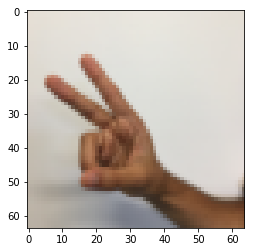

In [22]:
index=6
plt.imshow(X_train_orig[index])
print("y="+str(np.squeeze(Y_train_orig[:,index])))

In [23]:
X_train_orig.shape,X_test_orig.shape

((1080, 64, 64, 3), (120, 64, 64, 3))

## 整理数据

In [24]:
# 三维转一维向量
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

In [25]:
X_train_flatten.shape

(12288, 1080)

In [26]:
# 归一化
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.

In [40]:
Y_train_orig.shape

(1, 1080)

In [43]:
Y_train=np.eye(6)[Y_train_orig.ravel()].T
Y_test=np.eye(6)[Y_test_orig.ravel()].T

In [45]:
index=11
Y_train_orig[:,index],Y_train[:,index]

(array([1], dtype=int64), array([0., 1., 0., 0., 0., 0.]))

In [46]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape,

((12288, 1080), (6, 1080), (12288, 120), (6, 120))

## 创建数据占位符
训练数据=占位符

In [47]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(shape=[n_x, None],dtype=tf.float32)  
    Y = tf.placeholder(shape=[n_y, None],dtype=tf.float32)  
    return X, Y

In [48]:
X,Y=create_placeholders(X_train.shape[0],Y_train.shape[0])
X,Y

(<tf.Tensor 'Placeholder_2:0' shape=(12288, ?) dtype=float32>,
 <tf.Tensor 'Placeholder_3:0' shape=(6, ?) dtype=float32>)

## 初始化参数$W,b$

In [49]:
def initialize_parameters():  
    tf.set_random_seed(1)
    W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))  
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())  
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))  
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())  
    W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))  
    b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())  
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}    
    return parameters

In [50]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
parameters

{'W1': <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>,
 'b1': <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>,
 'W2': <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>,
 'b2': <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>,
 'W3': <tf.Variable 'W3:0' shape=(6, 12) dtype=float32_ref>,
 'b3': <tf.Variable 'b3:0' shape=(6, 1) dtype=float32_ref>}

## 前向传播

In [51]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    Z1 = tf.add(tf.matmul(W1,X),b1)                                             
    A1 = tf.nn.relu(Z1)                                         
    Z2 = tf.add(tf.matmul(W2,A1),b2)                                
    A2 = tf.nn.relu(Z2)                                            
    Z3 = tf.add(tf.matmul(W3,A2),b3)                                                 
    return Z3

In [52]:
tf.reset_default_graph()
with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
Z3

<tf.Tensor 'Add_2:0' shape=(6, ?) dtype=float32>

## 成本函数

In [53]:
def compute_cost(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))  
    return cost

In [54]:
tf.reset_default_graph()
with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
cost

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



<tf.Tensor 'Mean:0' shape=() dtype=float32>

## 后向传播，梯度下降

```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
...
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
```

## 建立模型

In [56]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 2**5, print_cost = True):    
    ops.reset_default_graph()
    tf.set_random_seed(1)    
    seed = 3                 
    (n_x, m) = X_train.shape 
    n_y = Y_train.shape[0]   
    costs = []               

    X, Y = create_placeholders(n_x, n_y)  

    parameters = initialize_parameters()  

    Z3 = forward_propagation(X, parameters)  

    cost = compute_cost(Z3, Y)  

    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)  

    init = tf.global_variables_initializer()  
  
    with tf.Session() as sess:      
        sess.run(init)            
        for epoch in range(num_epochs):  
  
            epoch_cost = 0.
            num_minibatches = int(m / minibatch_size)  
            seed = seed + 1  
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)  
  
            for minibatch in minibatches:  
                (minibatch_X, minibatch_Y) = minibatch  
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})                    
                epoch_cost += minibatch_cost / num_minibatches  
            if print_cost == True and epoch % 100 == 0:  
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))  
            if print_cost == True and epoch % 5 == 0:  
                costs.append(epoch_cost)  

        plt.plot(np.squeeze(costs))  
        plt.ylabel('cost')  
        plt.xlabel('iterations (per tens)')  
        plt.title("Learning rate =" + str(learning_rate))  
        plt.show()  
  
        parameters = sess.run(parameters)  
        print ("Parameters have been trained!")  
  
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))  
  
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))  
  
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))  
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))  
          
        return parameters  

In [57]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):   
    m = X.shape[1] 
    mini_batches = []
    np.random.seed(seed)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))
    
    num_complete_minibatches = math.floor(m/mini_batch_size) 
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.016458
Cost after epoch 200: 0.733102
Cost after epoch 300: 0.572938
Cost after epoch 400: 0.468799
Cost after epoch 500: 0.380979
Cost after epoch 600: 0.313819
Cost after epoch 700: 0.254258
Cost after epoch 800: 0.203795
Cost after epoch 900: 0.166410
Cost after epoch 1000: 0.141497
Cost after epoch 1100: 0.107579
Cost after epoch 1200: 0.086229
Cost after epoch 1300: 0.059415
Cost after epoch 1400: 0.052237


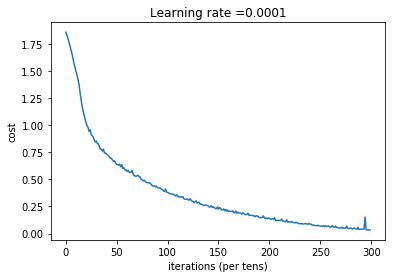

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.71666664


In [59]:
parameters = model(X_train, Y_train, X_test, Y_test)

**注：**
1. 基于训练集和测试集的表现，可以判断训练的模型存在过拟合问题，可以使用正则方法。

## 预测

In [66]:
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

d:\env\pythonve\test36\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
d:\env\pythonve\test36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


Your algorithm predicts: y = 3


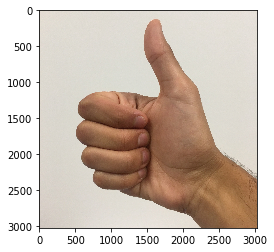

In [67]:
import scipy
from PIL import Image
from scipy import ndimage

my_image = "thumbs_up.jpg"

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))